In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('adult.csv')
data = pd.DataFrame(data)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [2]:
data.shape

(48842, 15)

In [3]:
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [4]:
data.replace('?', np.nan, inplace=True)

In [5]:
data.isna().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


In [6]:
data.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
educational-num,int64
marital-status,object
occupation,object
relationship,object
race,object
gender,object


In [7]:
# Fill missing values  categorical columns
numerical_cols = ['capital-gain', 'capital-loss', 'hours-per-week']

categorical_cols = ['race', 'gender', 'native-country', 'occupation', 'workclass', 'relationship', 'marital-status', 'education']
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})

# One-hot encode categorical variables
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print("Data loaded and preprocessed successfully!")
print("Shape of the data:", data.shape)


Data loaded and preprocessed successfully!
Shape of the data: (48842, 98)


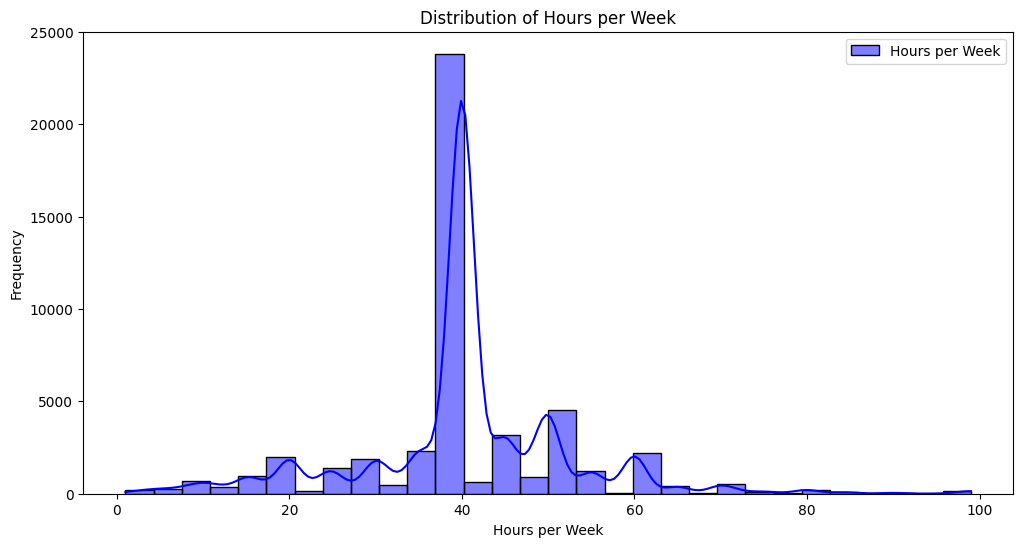

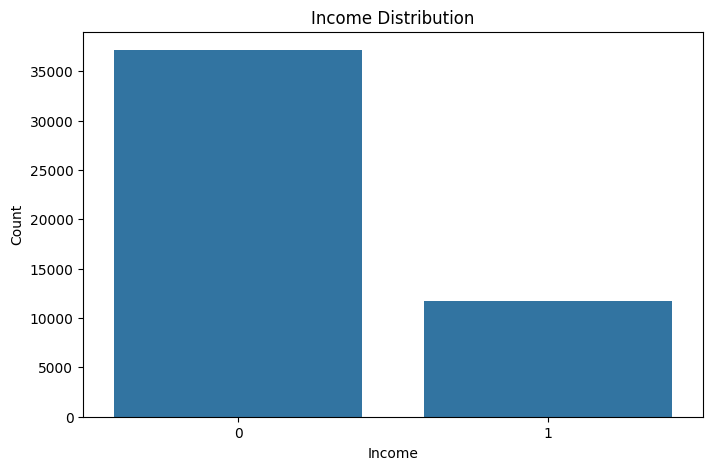

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data['hours-per-week'], bins=30, kde=True, color='blue', label='Hours per Week')
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='income', data=data)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = data.drop(columns=['income'])
y = data['income']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

print("Data split into training, validation, and test sets successfully!")


Data split into training, validation, and test sets successfully!


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

rf_predictions = rf_model.predict(x_val)

rf_auc = roc_auc_score(y_val, rf_predictions)

print("Random Forest Classification Report:")
print(classification_report(y_val, rf_predictions))
print(f"Random Forest AUC: {rf_auc}")


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5642
           1       0.72      0.62      0.67      1684

    accuracy                           0.86      7326
   macro avg       0.80      0.77      0.79      7326
weighted avg       0.85      0.86      0.85      7326

Random Forest AUC: 0.7747716902666716


In [12]:
from sklearn.linear_model import LogisticRegression

# Build and evaluate Logistic Regression Model
lr_model = LogisticRegression(max_iter=5000, random_state=42)
lr_model.fit(x_train, y_train)
lr_predictions = lr_model.predict(x_val)
# predict_proba للحصول على احتمالات الفئة الإيجابية
lr_auc = roc_auc_score(y_val, lr_model.predict_proba(x_val)[:, 1])

print("Logistic Regression Classification Report:")
print(classification_report(y_val, lr_predictions))
print(f"Logistic Regression AUC: {lr_auc}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5642
           1       0.72      0.57      0.63      1684

    accuracy                           0.85      7326
   macro avg       0.80      0.75      0.77      7326
weighted avg       0.84      0.85      0.84      7326

Logistic Regression AUC: 0.8938827052956239


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build a neural network
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = nn_model.fit(x_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(x_val_scaled, y_val))

#  (loss) and (accuracy) قيم أداء النموذج على مجموعة التحقق باستخدام
nn_val_loss, nn_val_accuracy = nn_model.evaluate(x_val_scaled, y_val, verbose=0)
nn_predictions = (nn_model.predict(x_val_scaled) > 0.5).astype(int)
nn_auc = roc_auc_score(y_val, nn_model.predict(x_val_scaled))

print("Neural Network Classification Report:")
print(classification_report(y_val, nn_predictions))
print(f"Neural Network AUC: {nn_auc}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1069/1069 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8139 - loss: 0.4082 - val_accuracy: 0.8531 - val_loss: 0.3202
Epoch 2/20
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8452 - loss: 0.3337 - val_accuracy: 0.8561 - val_loss: 0.3154
Epoch 3/20
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8515 - loss: 0.3226 - val_accuracy: 0.8582 - val_loss: 0.3128
Epoch 4/20
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8494 - loss: 0.3214 - val_accuracy: 0.8571 - val_loss: 0.3110
Epoch 5/20
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8530 - loss: 0.3176 - val_accuracy: 0.8578 - val_loss: 0.3134
Epoch 6/20
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8565 - loss: 0.3111 - val_accuracy: 0.8594 - val_loss: 0.3099
Epoch 7/20
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8579 - loss: 0.3076 - val_accuracy: 0.8586 - val_loss: 0.3073
Epoch 8/20
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8568 - loss: 0.3080 - val_accurac

In [18]:
nn_predictions_test = (nn_model.predict(x_test_scaled) > 0.5).astype(int)
nn_auc_test = roc_auc_score(y_test, nn_predictions_test)
print("Neural Network Test AUC:", nn_auc_test)


229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Neural Network Test AUC: 0.7656874486398896


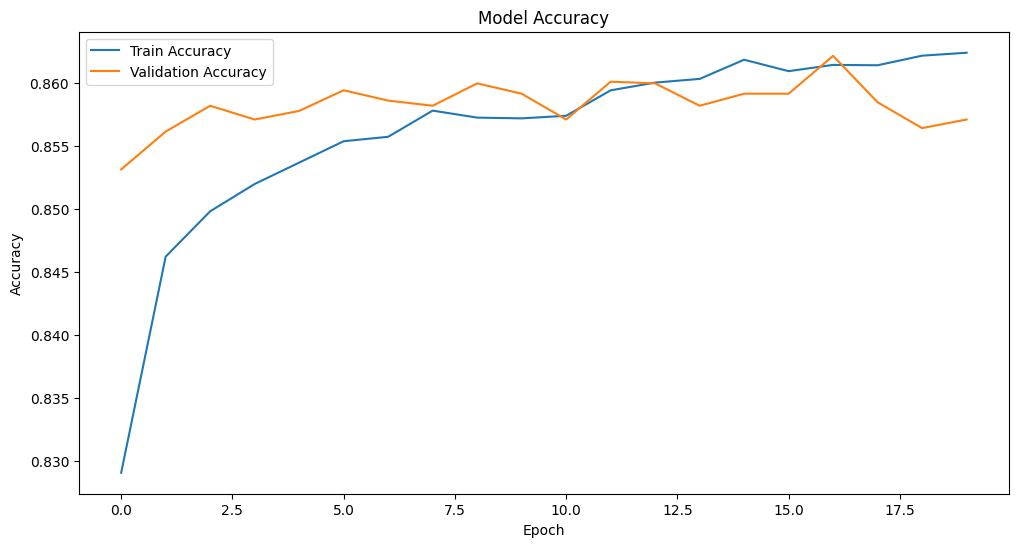

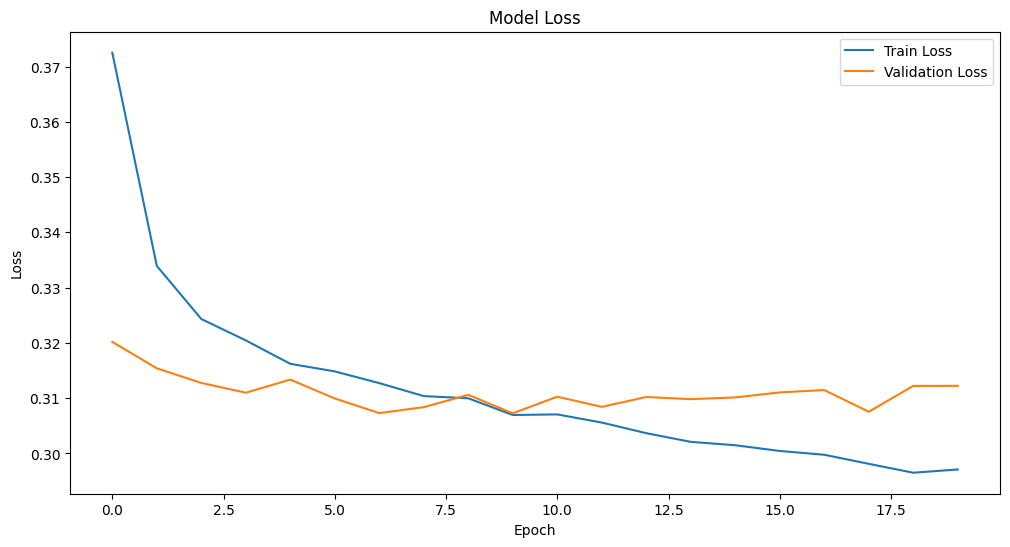

In [14]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [15]:
final_results = {
    "Random Forest": {"AUC": rf_auc},
    "Logistic Regression": {"AUC": lr_auc},
    "Neural Network": {"AUC": nn_auc}
}

print("Final Model Comparison:")
for model, metrics in final_results.items():
    print(f"{model}: AUC = {metrics['AUC']}")


Final Model Comparison:
Random Forest: AUC = 0.7747716902666716
Logistic Regression: AUC = 0.8938827052956239
Neural Network: AUC = 0.9076256524488461
